<a href="https://colab.research.google.com/github/canasep/mackprojeto2/blob/main/codes/PROJETO_APLICADO_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROJETO APLICADO 2

## IMPORTAÇÃO GITHUB

In [1]:
!git clone https://github.com/canasep/mackprojeto2.git

Cloning into 'mackprojeto2'...
remote: Enumerating objects: 103, done.
remote: Counting objects: 100% (103/103), done.
remote: Compressing objects: 100% (91/91), done.
remote: Total 103 (delta 34), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (103/103), 5.06 MiB | 11.52 MiB/s, done.
Resolving deltas: 100% (34/34), done.


## **IMPORTAÇÃO DA DATABASE DO KAGGLE**

In [2]:
import kagglehub
import os
import shutil

# DOWNLOAD ULTIMA VERSÃO
path = kagglehub.dataset_download("ikramshah512/amazon-products-sales-dataset-42k-items-2025")

# CRIA A PASTA E MOVE OS ARQUIVOS IMPORTADOS

destination_dir = '/content/kaggle_data'
os.makedirs(destination_dir, exist_ok=True)
source_path = path
files_to_move = os.listdir(source_path)

for file_name in files_to_move:
    source_file = os.path.join(source_path, file_name)
    destination_file = os.path.join(destination_dir, file_name)
    shutil.move(source_file, destination_file)


## IMPRESSÃO DOS CAMINHOS

print(f"ARQUIVOS MOVIDOS PARA: {destination_dir}")
print(os.listdir(destination_dir))



100%|██████████| 7.71M/7.71M [00:00<00:00, 144MB/s]

Extracting files...


ARQUIVOS MOVIDOS PARA: /content/kaggle_data
['amazon_products_sales_data_uncleaned.csv', 'amazon_products_sales_data_cleaned.csv']


### **CRIAÇÃO DO DATASET A PARTIR DO CSV RAW**

In [3]:
# IMPORTAÇÃO DO CSV E CRIAÇÃO DO DATASET

## IMPORTANDO PACOTE PANDAS E NUMPY

import pandas as pd
import numpy as np

### CAMINHO PARA O ARQUIVO RAW
file_path = '/content/kaggle_data/amazon_products_sales_data_uncleaned.csv'

### CRIAÇÃO DO DATAFRAME
try:
    df_raw = pd.read_csv(file_path)
    print("Dataset criado com sucesso a partir do arquivo selecionado!")
except Exception as e:
    print(f"Erro ao criar o dataset: {e}")

Dataset criado com sucesso a partir do arquivo selecionado!


**IMPRESSÃO DO HEAD DO DATASET DF**

In [4]:
# IMPRESSÃO DO HEAD DO DATASET DF

df_raw.head()


,title,rating,number_of_reviews,bought_in_last_month,current/discounted_price,price_on_variant,listed_price,is_best_seller,is_sponsored,is_couponed,buy_box_availability,delivery_details,sustainability_badges,image_url,product_url,collected_at
0,BOYA BOYALINK 2 Wireless Lavalier Microphone f...,4.6 out of 5 stars,375,300+ bought in past month,89.68,basic variant price: 2.4GHz,$159.00,No Badge,Sponsored,Save 15% with coupon,Add to cart,"Delivery Mon, Sep 1",Carbon impact,https://m.media-amazon.com/images/I/71pAqiVEs3...,/sspa/click?ie=UTF8&spc=MTo4NzEzNDY2NTQ5NDYxND...,2025-08-21 11:14:29
1,"LISEN USB C to Lightning Cable, 240W 4 in 1 Ch...",4.3 out of 5 stars,"2,457",6K+ bought in past month,9.99,basic variant price: nan,$15.99,No Badge,Sponsored,No Coupon,Add to cart,"Delivery Fri, Aug 29",NaN,https://m.media-amazon.com/images/I/61nbF6aVIP...,/sspa/click?ie=UTF8&spc=MTo4NzEzNDY2NTQ5NDYxND...,2025-08-21 11:14:29
2,"DJI Mic 2 (2 TX + 1 RX + Charging Case), Wirel...",4.6 out of 5 stars,"3,044",2K+ bought in past month,314.00,basic variant price: nan,$349.00,No Badge,Sponsored,No Coupon,Add to cart,"Delivery Mon, Sep 1",NaN,https://m.media-amazon.com/images/I/61h78MEXoj...,/sspa/click?ie=UTF8&spc=MTo4NzEzNDY2NTQ5NDYxND...,2025-08-21 11:14:29
3,"Apple AirPods Pro 2 Wireless Earbuds, Active N...",4.6 out of 5 stars,"35,882",10K+ bought in past month,NaN,basic variant price: $162.24,No Discount,Best Seller,Organic,No Coupon,NaN,NaN,NaN,https://m.media-amazon.com/images/I/61SUj2aKoE...,/Apple-Cancellation-Transparency-Personalized-...,2025-08-21 11:14:29
4,Apple AirTag 4 Pack. Keep Track of and find Yo...,4.8 out of 5 stars,"28,988",10K+ bought in past month,NaN,basic variant price: $72.74,No Discount,No Badge,Organic,No Coupon,NaN,NaN,NaN,https://m.media-amazon.com/images/I/61bMNCeAUA...,/Apple-MX542LL-A-AirTag-Pack/dp/B0D54JZTHY/ref...,2025-08-21 11:14:29


QUANTIDADE DE INSTANCIAS E ATRIBUTOS






In [5]:
# QUANTIDADE DE INSTANCIAS E ATRIBUTOS
df_raw.shape

(42675, 16)

IMPRESSÃO DOS ATRIBUTOS DA BASE DE DADOS

In [6]:
## IMPRESSÃO ATRIBUTOS DA BASE DE DADOS
print(df_raw.columns)

Index(['title', 'rating', 'number_of_reviews', 'bought_in_last_month',
       'current/discounted_price', 'price_on_variant', 'listed_price',
       'is_best_seller', 'is_sponsored', 'is_couponed', 'buy_box_availability',
       'delivery_details', 'sustainability_badges', 'image_url', 'product_url',
       'collected_at'],
      dtype='object')


# **LIMPEZA E NORMALIZAÇÃO DOS DADOS**

## CRIAÇÃO DE CÓPIA DA BASE DE DADOS PARA TRATAMENTO

In [299]:
# LIMPEZA E NORMALIZAÇÃO DOS DADOS

## CRIACAO DE CÓPIA DA BASE DE DADOS PARA TRATAMENTO

df = df_raw.copy()
print('Cópia da base de dados realizada')

Cópia da base de dados realizada


## RETIRADA DE COLUNAS QUE NÃO SERÃO UTILIZADAS


In [300]:
## RETIRADA DE COLUNAS QUE NÃO SERÃO UTILIZADAS

df = df.drop(columns=["product_url", "image_url", "delivery_details", "sustainability_badges"])
print('Colunas excluidas com sucesso')

Colunas excluidas com sucesso


### ATRIBUTOS A SEREM UTILIZADOS NA ANALISE

In [301]:
print(df.columns)

Index(['title', 'rating', 'number_of_reviews', 'bought_in_last_month',
       'current/discounted_price', 'price_on_variant', 'listed_price',
       'is_best_seller', 'is_sponsored', 'is_couponed', 'buy_box_availability',
       'collected_at', 'marca'],
      dtype='object')


#### RENOMEAÇÃO DE ATRIBUTOS PARA MELHOR ENTENDIMENTO

In [302]:
df = df.rename(columns={"title": "produto",
                        "number_of_reviews":"totalavaliacoes",
                        "bought_in_last_month": "unidadesvendidas",
                        "current/discounted_price":"precoatual",
                        "price_on_variant":"preconavariacaoprincipal",
                        "listed_price":"precoanuncio",
                        "is_best_seller": "certproduto",
                        "is_sponsored":"patrocinado",
                        "is_couponed": "cupomdesconto",
                        "buy_box_availability":"compradireta",
                        "collected_at":"datadavenda"})
print("Atributos renomeados para melhor entendimento")

Atributos renomeados para melhor entendimento


## NORMALIZAÇÃO DOS DADOS - TRANSFORMAÇÃO EM DADOS QUANTITATIVOS - NUMÉRICO
### QUANTIDADE DE PRODUTOS VENDIDOS

In [303]:
### QUANTIDADE DE PRODUTOS VENDIDOS

df["unidadesvendidas"] = df["unidadesvendidas"].str.replace(r"\+.*", "", regex=True)
df["unidadesvendidas"] = df["unidadesvendidas"].str.replace(r"K", "000", regex=True)
df["unidadesvendidas"] = pd.to_numeric(
    df["unidadesvendidas"].str.split("+").str[0],
    errors="coerce"
)
print("Tratamento da quantidade de vendas no último mês realizada")

Tratamento da quantidade de vendas no último mês realizada


RATING DO PRODUTO

In [304]:
### RATING DO PRODUTO

df["rating"] = df["rating"].str[:3]
df["rating"] = pd.to_numeric(
    df["rating"].str.split("+").str[0],
    errors="coerce"
)

df["rating"] = df["rating"] * 2

print("Tratamento do rating feito, o rating está de 0 a 10")

Tratamento do rating feito, o rating está de 0 a 10


TOTAL DE AVALIAÇÕES

In [305]:
### TOTAL DE AVALIAÇÕES

df["totalavaliacoes"] = (
    df["totalavaliacoes"]
    .astype(str)
    .str.replace(",", "", regex=False)
)
df["totalavaliacoes"] = pd.to_numeric(df["totalavaliacoes"], errors="coerce")

print("Tratamento do Total de Avaliações concluído, atributo convertido para numérico")

Tratamento do Total de Avaliações concluído, atributo convertido para numérico


VALOR DO PRODUTO - PREÇO ANUNCIADO

In [306]:
### VALOR DO PRODUTO - PREÇO ANUNCIADO

df["precoanuncio"] = (
    df["precoanuncio"]
    .str.replace("$", "", regex=False)
    .str.replace(" ", "", regex=False)
    .replace("NoDiscount", "0")
)
df["precoanuncio"] = pd.to_numeric(df["precoanuncio"], errors="coerce").fillna(0)

print("Tratamento do Preço Anunciado concluído")

Tratamento do Preço Anunciado concluído


VALOR DO PRODUTO - PREÇO DA VARIAÇÃO PRINCIPAL

In [307]:
### VALOR DO PRODUTO - PREÇO DA VARIAÇÃO PRINCIPAL

df["preconavariacaoprincipal"] = (
    df["preconavariacaoprincipal"]
    .str.extract(r'\$([0-9]+(?:\.[0-9]+)?)', expand=False)
    .fillna(0)
    .astype(float)
)

df["preconavariacaoprincipal"] = pd.to_numeric(df["preconavariacaoprincipal"], errors="coerce").fillna(0)

print("Tratamento do preço na variação principal concluído")

Tratamento do preço na variação principal concluído


VALOR DO PRODUTO - PREÇO ATUAL

In [308]:
# VALOR DO PRODUTO - PREÇO ATUAL

df["precoatual"] = pd.to_numeric(df["precoatual"], errors="coerce")
print("Preço atual convertido para numérico.")

Preço atual convertido para numérico.


### **TRATAMENTO DO ATRIBUTO CUPOM DE DESCONTO**
#### DIVISÃO DO ATRIBUTO EM BINÁRIO, % E VALOR TOTAL

In [309]:
# TRATAMENTO DO ATRIBUTO CUPOM DE DESCONTO

## PREENCHE VALORES NULOS
s = df["cupomdesconto"].fillna("")

## EXTRAI DADOS E CONVERTE EM NUMERICO
pct_raw = s.str.extract(r'(\d+(?:\.\d+)?)\s*%', expand=False)
val_raw = s.str.extract(r'\$\s*([0-9]+(?:\.[0-9]+)?)', expand=False)

# CRIAÇÃO DE NOVAS COLUNAS
df["porcentagem_cupomdesconto"] = np.where(
    pct_raw.notna(), pd.to_numeric(pct_raw, errors="coerce") / 100.0, 0.0
)
df["valor_cupomdesconto"] = np.where(
    val_raw.notna(), pd.to_numeric(val_raw, errors="coerce"), 0.0
)

## TORNA O ATRIBUTO CUPOMDESCONTO EM BINARIO
mask_no = s.str.contains("No Coupon", case=False, na=False)
df["cupomdesconto"] = np.where(mask_no, 0, 1)


print("Tratamento da coluna cupomdesconto foi dividida em três colunas: cupomdesconsto (binária), porcentagem_cupomdesconto (em float) e valor_cupomdesconto (em float).")

Tratamento da coluna cupomdesconto foi dividida em três colunas: cupomdesconsto (binária), porcentagem_cupomdesconto (em float) e valor_cupomdesconto (em float).


### TRATAR ATRIBUTO COMPRA DIRETA

CONVERSÃO EM BINÁRIO

In [310]:
# TRATAR ATRIBUTO COMPRA DIRETA

df["compradireta"].value_counts()

,count
compradireta,
Add to cart,28022


In [311]:
# CONVERSÃO DO ATRIBUTO EM BINÁRIO

df["compradireta"] = (
    df["compradireta"]
    .fillna("")
    .str.contains("Add to cart", case=False)
    .astype(int)
)

print("Coluna compradireta convertida em binária")

Coluna compradireta convertida em binária


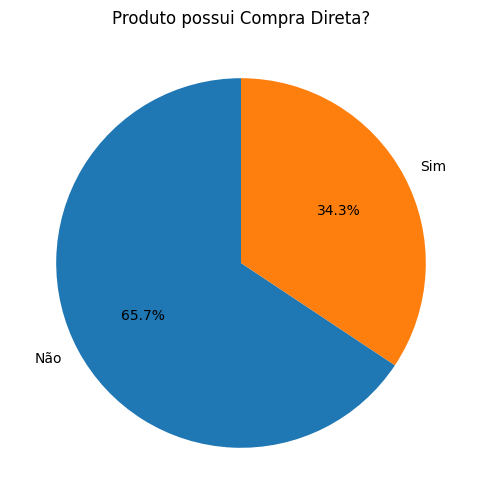

In [312]:
import matplotlib.pyplot as plt
import seaborn as sns

compradireta_counts = df['compradireta'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(compradireta_counts.values, labels=['Não', 'Sim'], autopct='%1.1f%%', startangle=90)
plt.title('Produto possui Compra Direta?')
plt.show()

#### TRATAMENTO ATRIBUTO CERTIFICADO DE PRODUTO

In [313]:
### CERTIFICADO DO PRODUTO

df["certproduto"].value_counts()

,count
certproduto,
No Badge,40814
Amazon's,744
Limited time deal,409
Best Seller,275
Save 30%,125
Ends in,97
Save 10%,61
Save 18%,57
Save 17%,51


In [314]:
# NORMALIZAÇÃO E LIMPEZA

def normalize_certproduto(value):
    if isinstance(value, str):
        if "Save" in value or "Limited time deal" in value:
            return "produtocomdesconto"
        elif "Amazon" in value:
            return "amazonchoice"
        elif "Best Seller" in value:
            return "maisvendido"
        elif "No Badge" in value:
            return "semcertificado"
    else:
      return value

df["certproduto"] = df["certproduto"].apply(normalize_certproduto)

print("Atributo Certificado normalizado.")

Atributo Certificado normalizado.


In [315]:
# INSTÂNCIAS ATUAIS
df["certproduto"].value_counts()

,count
certproduto,
semcertificado,40814
produtocomdesconto,745
amazonchoice,744
maisvendido,275


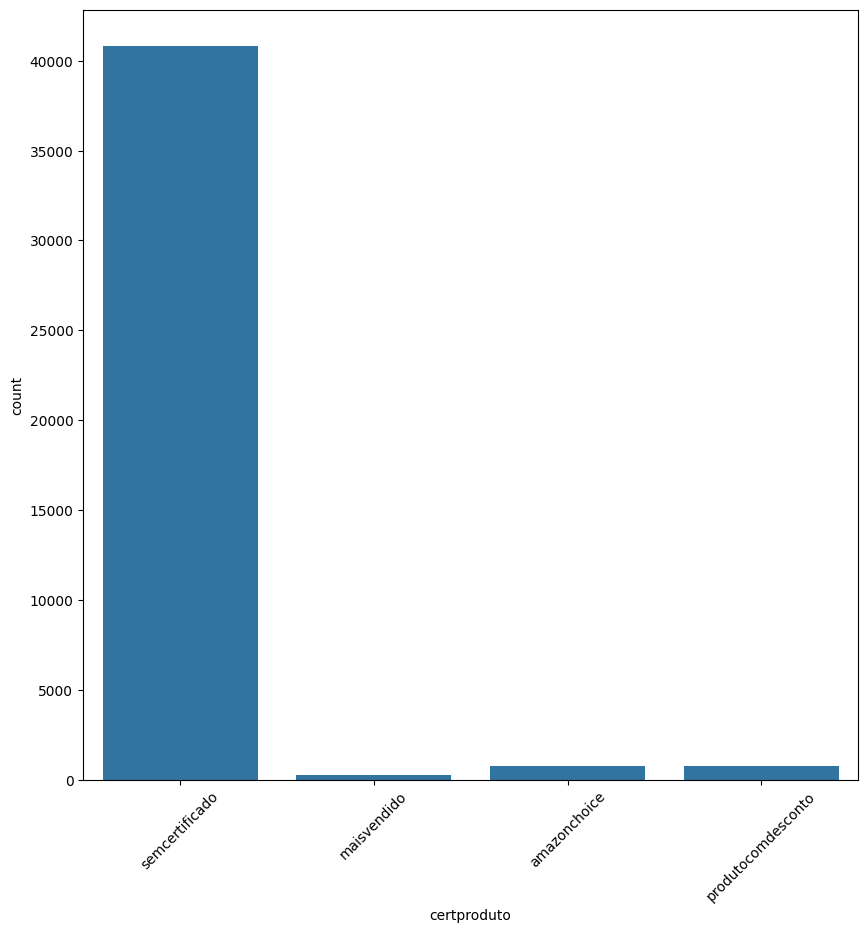

In [316]:
plt.figure(figsize=(10,10))
sns.countplot(data=df, x="certproduto")
plt.xticks(rotation=45)
plt.show()

In [317]:
# CRIAÇÃO DE NOVOS ATRIBUTOS - AMAZON'S CHOICE E MAIS VENDIDO
# TRANSFORMAÇÃO DO CERTPRODUTO EM BINÁRIO
df["maisvendido"] = df["certproduto"].str.contains("maisvendido", case=False, na=False).astype(int)
df['maisvendido'] = df['maisvendido'].apply(lambda x: 1 if x == 'maisvendido' else 0)

df["amazonchoice"] = df["certproduto"].str.contains("amazonchoice", case=False, na=False).astype(int)
df['amazonchoice'] = df['amazonchoice'].apply(lambda x: 1 if x == 'amazonchoice' else 0)

df["certproduto"] = df['certproduto'].apply(lambda x: 0 if x == 'semcertificado' else 0)

print("Atributos Amazon's Choice e Mais Vendidos criados com sucesso. Certificado transformado em binário")


Atributos Amazon's Choice e Mais Vendidos criados com sucesso. Certificado transformado em binário


#### TRATAMENTO DO ATRIBUTO - ANUNCIO PATROCINADO

CONVERSÃO EM BINÁRIO

In [318]:
df['patrocinado'].value_counts()

,count
patrocinado,
Organic,35664
Sponsored,7011


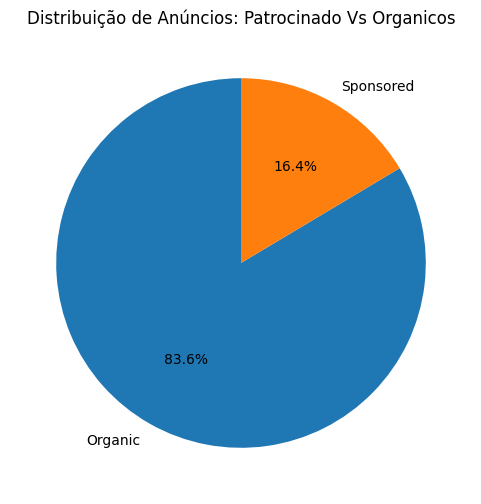

In [319]:
patrocinado_counts = df['patrocinado'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(patrocinado_counts.values, labels=['Organic', 'Sponsored'], autopct='%1.1f%%', startangle=90)
plt.title('Distribuição de Anúncios: Patrocinado Vs Organicos')
plt.show()

In [320]:
df['patrocinado'] = df['patrocinado'].apply(lambda x: 1 if x == 'Sponsored' else 0)
print("Coluna patrocinado convertida para binário (1 para Patrocinado, 0 para Organico).")

Coluna patrocinado convertida para binário (1 para Patrocinado, 0 para Organico).


### DATA DA COLETA DE DADOS

In [321]:
### DATA DA COLETA DE DADOS

df["datadavenda"] = pd.to_datetime(df["datadavenda"], errors="coerce")
df["datadavenda"] = df["datadavenda"].dt.month
print("Mantido só o mês, que é a informação crucial da data da coleta. Ano já era conhecido - 2025")

Mantido só o mês, que é a informação crucial da data da coleta. Ano já era conhecido - 2025


# **CALCULO DO VALOR ORIGINAL DO PRODUTO**

In [322]:
## PARA FACILITAR OS CALCULOS

current = df['precoatual']
pct = df['porcentagem_cupomdesconto']
val = df['valor_cupomdesconto']
variant = df['preconavariacaoprincipal']


# REGRAS DE CALCULO:

## 1 - SE HOUVER % DE DESCONTO - PRECO ORIGINAL = PRECO ATUAL / ( 1 - % DESCONTO)
### EVITAR DIVISÃO POR ZERO; clip pct para [0, 0.999999])
pct_safe = pct.clip(lower=0.0, upper=0.999999)
price_from_pct = current / (1.0 - pct_safe)

## 2 - SE HOUVER VALOR ABSOLUTO - PRECO ORIGINAL = PRECO ATUAL + VALOR DE DESCONTO
price_from_val = current + val

## 3 - SE NÃO HOUVER DESCONTO - PREÇO ORIGINAL = PREÇO ATUAL
price_from_cur = current

## 4 - SE PREÇO ATUAL NULO, USAR PREÇO NA VARIAÇÃO PRINCIPAL
### MONTAGEM FINAL
### (PRIORIDADE: pct > 0  -> val > 0 -> cur -> variant)
cond_pct = (current.notna()) & (pct > 0)
cond_val = (current.notna()) & (pct == 0) & (val > 0)
cond_cur = (current.notna()) & (pct == 0) & (val == 0)

df["precoproduto"] = np.select(
    [cond_pct, cond_val, cond_cur],
    [price_from_pct, price_from_val, price_from_cur],
    default=variant
)

# GARANTIA DE FLOAT

df["precoproduto"] = df["precoproduto"].astype(float)

print("Preço do Produto calculado com sucesso")


Preço do Produto calculado com sucesso


In [323]:
df.head()

,produto,rating,totalavaliacoes,unidadesvendidas,precoatual,preconavariacaoprincipal,precoanuncio,certproduto,patrocinado,cupomdesconto,compradireta,datadavenda,marca,porcentagem_cupomdesconto,valor_cupomdesconto,maisvendido,amazonchoice,precoproduto
0,BOYA BOYALINK 2 Wireless Lavalier Microphone f...,9.2,375.0,300.0,89.68,0.00,159.00,0,1,1,1,8,BOYA,0.15,0.0,0,0,105.505882
1,"LISEN USB C to Lightning Cable, 240W 4 in 1 Ch...",8.6,2457.0,6000.0,9.99,0.00,15.99,0,1,0,1,8,LISEN,0.00,0.0,0,0,9.990000
2,"DJI Mic 2 (2 TX + 1 RX + Charging Case), Wirel...",9.2,3044.0,2000.0,314.00,0.00,349.00,0,1,0,1,8,DJI,0.00,0.0,0,0,314.000000
3,"Apple AirPods Pro 2 Wireless Earbuds, Active N...",9.2,35882.0,10000.0,NaN,162.24,0.00,0,0,0,0,8,Apple,0.00,0.0,0,0,162.240000
4,Apple AirTag 4 Pack. Keep Track of and find Yo...,9.6,28988.0,10000.0,NaN,72.74,0.00,0,0,0,0,8,Apple,0.00,0.0,0,0,72.740000


# CRIAÇÃO DO ATRIBUTO MARCA

In [326]:
# CRIAÇÃO DO ATRIBUTO MARCA

df["marca"] = df["produto"].str.split().str[0]

In [327]:
df.head()

,produto,rating,totalavaliacoes,unidadesvendidas,precoatual,preconavariacaoprincipal,precoanuncio,certproduto,patrocinado,cupomdesconto,compradireta,datadavenda,marca,porcentagem_cupomdesconto,valor_cupomdesconto,maisvendido,amazonchoice,precoproduto
0,BOYA BOYALINK 2 Wireless Lavalier Microphone f...,9.2,375.0,300.0,89.68,0.00,159.00,0,1,1,1,8,BOYA,0.15,0.0,0,0,105.505882
1,"LISEN USB C to Lightning Cable, 240W 4 in 1 Ch...",8.6,2457.0,6000.0,9.99,0.00,15.99,0,1,0,1,8,LISEN,0.00,0.0,0,0,9.990000
2,"DJI Mic 2 (2 TX + 1 RX + Charging Case), Wirel...",9.2,3044.0,2000.0,314.00,0.00,349.00,0,1,0,1,8,DJI,0.00,0.0,0,0,314.000000
3,"Apple AirPods Pro 2 Wireless Earbuds, Active N...",9.2,35882.0,10000.0,NaN,162.24,0.00,0,0,0,0,8,Apple,0.00,0.0,0,0,162.240000
4,Apple AirTag 4 Pack. Keep Track of and find Yo...,9.6,28988.0,10000.0,NaN,72.74,0.00,0,0,0,0,8,Apple,0.00,0.0,0,0,72.740000


In [328]:
# CONTAGEM DE INSTANCIAS DAS MARCAS

df['marca'].value_counts()

,count
marca,
ASURION,3062
HP,1966
Duracell,1086
Sony,964
Energizer,944
...,...
Goodyear,1
Sangean,1
Aquaphor,1


In [329]:
### CRIAR BASE COM A EMPRESA ASURION

df_asurion = df[df["marca"] == "ASURION"]
display(df_asurion)

,produto,rating,totalavaliacoes,unidadesvendidas,precoatual,preconavariacaoprincipal,precoanuncio,certproduto,patrocinado,cupomdesconto,compradireta,datadavenda,marca,porcentagem_cupomdesconto,valor_cupomdesconto,maisvendido,amazonchoice,precoproduto
455,ASURION 3 Year Home Improvement Protection Pla...,8.8,4109.0,NaN,NaN,5.99,0.0,0,0,0,0,8,ASURION,0.0,0.0,0,0,5.99
569,ASURION 2 Year Electronics Protection Plan ($3...,8.6,8671.0,NaN,NaN,3.99,0.0,0,0,0,0,8,ASURION,0.0,0.0,0,0,3.99
719,ASURION 2 Year Furniture Protection Plan ($125...,8.6,505.0,NaN,NaN,27.99,0.0,0,0,0,0,8,ASURION,0.0,0.0,0,0,27.99
757,ASURION 3 Year Home Improvement Protection Pla...,8.6,2616.0,NaN,NaN,6.99,0.0,0,0,0,0,8,ASURION,0.0,0.0,0,0,6.99
805,ASURION 3 Year Home Improvement Protection Pla...,8.8,2247.0,NaN,NaN,7.99,0.0,0,0,0,0,8,ASURION,0.0,0.0,0,0,7.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42619,ASURION 2 Year Jewelry Protection Plan ($125 -...,7.2,25.0,NaN,16.99,0.00,0.0,0,0,0,0,8,ASURION,0.0,0.0,0,0,16.99
42631,ASURION 3 Year Portable Electronic Accident Pr...,8.6,485.0,NaN,64.99,0.00,0.0,0,0,0,0,8,ASURION,0.0,0.0,0,0,64.99
42643,ASURION 2 Year Jewelry Protection Plan ($125 -...,7.2,25.0,NaN,16.99,0.00,0.0,0,0,0,0,8,ASURION,0.0,0.0,0,0,16.99
42655,ASURION 3 Year Portable Electronic Accident Pr...,8.6,485.0,NaN,64.99,0.00,0.0,0,0,0,0,8,ASURION,0.0,0.0,0,0,64.99


In [330]:
# QUANTIDADE DE VENDAS DA MARCA COM MAIS INSTÂNCIAS
df_asurion['unidadesvendidas'].value_counts()

,count
unidadesvendidas,


In [331]:
print("Marca Asurion não possui vendas")

Marca Asurion não possui vendas


In [332]:
# EXCLUSÃO DE PRODUTOS COM MENOS DE 10 VENDAS

df = df[df["unidadesvendidas"] >= 10]
print("Produtos com menos de dez unidades vendidas removidos.")


Produtos com menos de dez unidades vendidas removidos.


In [333]:
df.shape

(32164, 18)

In [334]:
df['marca'].value_counts()

,count
marca,
HP,1117
Duracell,1084
Energizer,942
Sony,890
Dell,808
...,...
Behringer,1
Hoover,1
JABRA,1


In [338]:
# EXCLUSÃO DE MARCAS COM MENOS DE 10 PRODUTOS

marca_counts = df["marca"].value_counts()
marcas_to_keep = marca_counts[marca_counts >= 10].index
df = df[df["marca"].isin(marcas_to_keep)]
print("Marcas com menos de 10 produtos removidas.")

Marcas com menos de 10 produtos removidas.


In [339]:
df['marca'].value_counts()

,count
marca,
HP,1117
Duracell,1084
Energizer,942
Sony,890
Dell,808
...,...
ARRIS,10
BenQ,10
VELCRO,10


In [341]:
df.shape

(31104, 18)

In [342]:
# LISTA DE MARCAS NO DATASET

lista_marcas = df["marca"].unique().tolist()
print("A lista de marcas:")
print(lista_marcas)

A lista de marcas:
['LISEN', 'DJI', 'Apple', 'Texas', 'Amazon', 'Transformers', 'Seagate', 'Peak', 'Roku', 'Energizer', 'Duracell', 'Sony', 'HP', 'Mounting', 'Scotch', 'JBL', 'TP-Link', 'Samsung', 'SanDisk', 'Beats', 'AMD', 'PHILIPS', 'VIZIO', 'Logitech', 'Meta', 'Anker', 'Escort', 'Fitbit', 'myQ', 'Sceptre', 'Canon', 'Epson', 'Fujifilm', 'Avery', 'Soundcore', 'DEWALT', 'Monster', 'APC', 'Xbox', 'SAMSUNG', 'Philips', 'acer', 'EPSON', 'Brother', 'CyberPower', 'Baseus', 'Dell', 'DYMO', 'Acer', 'Bose', 'Crucial', 'Garmin', 'Skullcandy', 'ASUS', 'CORSAIR', 'NETGEAR', 'Pendaflex', 'iOttie', 'Lexar', 'KODAK', 'WD_BLACK', 'Hisense', 'Turtle', 'Belkin', 'MSI', 'Ubiquiti', 'AT&T', 'Razer', 'Mophie', 'UGREEN', 'Sonos', 'ARRIS', 'SHOKZ', 'Lenovo', 'OWC', 'VIVO', 'Casio', 'ARCTIC', 'Elgato', 'TCL', 'AINOPE', 'PNY', 'SteelSeries', 'Google', 'Panasonic', 'Kingston', 'E-Z', 'OtterBox', 'GoPro', 'Vortex', 'Tripp', 'Carhartt', 'Retevis', 'Spigen', 'Amazfit', 'Arlo', 'PowerA', 'Uniden', 'Kodak', 'HyperX

In [346]:
# CRIAÇÃO DE CATEGORIAS

brands_map = {
"Apple" : "Tecnologia e Eletronicos de Consumo",
"DJI" : "Fotografia e Produção de Conteúdo",
"Texas" : "Tecnologia e Eletronicos de Consumo",
"Amazon" : "Tecnologia e Eletronicos de Consumo",
"Transformers" : "Entretenimento / Brinquedos",
"Seagate" : "Tecnologia e Eletronicos de Consumo",
"Peak" : "Áudio e Acessórios",
"Roku" : "Casa, Segurança e Conectividade",
"Energizer" : "Energia, Baterias e Acessórios Elétricos",
"Duracell" : "Energia, Baterias e Acessórios Elétricos",
"Sony" : "Áudio, Som e Acessórios Musicais",
"HP" : "Tecnologia e Eletronicos de Consumo",
"Mounting" : "Ferramentas e Montagem",
"Scotch" : "Impressão, Escritório e Papelaria",
"JBL" : "Áudio, Som e Acessórios Musicais",
"TP-Link" : "Redes e Periféricos",
"Samsung" : "Tecnologia e Eletronicos de Consumo",
"SanDisk" : "Tecnologia e Eletronicos de Consumo",
"Beats" : "Áudio, Som e Acessórios Musicais",
"AMD" : "Tecnologia e Eletronicos de Consumo",
"PHILIPS" : "Tecnologia e Eletronicos de Consumo",
"VIZIO" : "Tecnologia e Eletronicos de Consumo",
"Logitech" : "Games e Entretenimento",
"Meta" : "Tecnologia e Eletronicos de Consumo",
"Anker" : "Energia, Baterias e Acessórios Elétricos",
"Escort" : "Automotivo e Comunicação",
"Fitbit" : "Casa, Segurança e Conectividade",
"myQ" : "Casa, Segurança e Conectividade",
"Sceptre" : "Tecnologia e Eletronicos de Consumo",
"Canon" : "Fotografia e Produção de Conteúdo",
"Epson" : "Impressão, Escritório e Papelaria",
"Fujifilm" : "Fotografia e Produção de Conteúdo",
"Avery" : "Impressão, Escritório e Papelaria",
"Soundcore" : "Áudio, Som e Acessórios Musicais",
"DEWALT" : "Ferramentas e Montagem",
"Monster" : "Áudio, Som e Acessórios Musicais",
"APC" : "Energia, Baterias e Acessórios Elétricos",
"Xbox" : "Games e Entretenimento",
"SAMSUNG" : "Tecnologia e Eletronicos de Consumo",
"Philips" : "Tecnologia e Eletronicos de Consumo",
"acer" : "Tecnologia e Eletronicos de Consumo",
"EPSON" : "Impressão, Escritório e Papelaria",
"Brother" : "Impressão, Escritório e Papelaria",
"CyberPower" : "Energia, Baterias e Acessórios Elétricos",
"Baseus" : "Energia, Baterias e Acessórios Elétricos",
"Dell" : "Tecnologia e Eletronicos de Consumo",
"DYMO" : "Impressão, Escritório e Papelaria",
"Acer" : "Tecnologia e Eletronicos de Consumo",
"Bose" : "Áudio, Som e Acessórios Musicais",
"Crucial" : "Tecnologia e Eletronicos de Consumo",
"Garmin" : "Casa, Segurança e Conectividade",
"Skullcandy" : "Áudio, Som e Acessórios Musicais",
"ASUS" : "Tecnologia e Eletronicos de Consumo",
"CORSAIR" : "Games e Entretenimento",
"NETGEAR" : "Redes e Periféricos",
"Pendaflex" : "Impressão, Escritório e Papelaria",
"iOttie" : "Casa, Segurança e Conectividade",
"Lexar" : "Tecnologia e Eletronicos de Consumo",
"KODAK" : "Fotografia e Produção de Conteúdo",
"WD_BLACK" : "Tecnologia e Eletronicos de Consumo",
"Hisense" : "Tecnologia e Eletronicos de Consumo",
"Turtle" : "Games e Entretenimento",
"Belkin" : "Redes e Periféricos",
"MSI" : "Tecnologia e Eletronicos de Consumo",
"Ubiquiti" : "Redes e Periféricos",
"AT&T" : "Redes e Periféricos",
"Razer" : "Games e Entretenimento",
"Mophie" : "Energia, Baterias e Acessórios Elétricos",
"UGREEN" : "Energia, Baterias e Acessórios Elétricos",
"Sonos" : "Áudio, Som e Acessórios Musicais",
"ARRIS" : "Redes e Periféricos",
"SHOKZ" : "Áudio, Som e Acessórios Musicais",
"Lenovo" : "Tecnologia e Eletronicos de Consumo",
"OWC" : "Tecnologia e Eletronicos de Consumo",
"VIVO" : "Casa, Segurança e Conectividade",
"Casio" : "Tecnologia e Eletronicos de Consumo",
"ARCTIC" : "Games e Entretenimento",
"Elgato" : "Fotografia e Produção de Conteúdo",
"TCL" : "Tecnologia e Eletronicos de Consumo",
"AINOPE" : "Energia, Baterias e Acessórios Elétricos",
"PNY" : "Tecnologia e Eletronicos de Consumo",
"SteelSeries" : "Games e Entretenimento",
"Google" : "Tecnologia e Eletronicos de Consumo",
"Panasonic" : "Tecnologia e Eletronicos de Consumo",
"Kingston" : "Tecnologia e Eletronicos de Consumo",
"E-Z" : "Casa, Segurança e Conectividade",
"OtterBox" : "Acessórios e Lifestyle",
"GoPro" : "Fotografia e Produção de Conteúdo",
"Vortex" : "Automotivo e Comunicação",
"Tripp" : "Energia, Baterias e Acessórios Elétricos",
"Carhartt" : "Acessórios e Lifestyle",
"Retevis" : "Automotivo e Comunicação",
"Spigen" : "Acessórios e Lifestyle",
"Amazfit" : "Casa, Segurança e Conectividade",
"Arlo" : "Casa, Segurança e Conectividade",
"PowerA" : "Games e Entretenimento",
"Uniden" : "Automotivo e Comunicação",
"Kodak" : "Fotografia e Produção de Conteúdo",
"HyperX" : "Games e Entretenimento",
"BlueParrott" : "Áudio, Som e Acessórios Musicais",
"Intel" : "Tecnologia e Eletronicos de Consumo",
"LG" : "Tecnologia e Eletronicos de Consumo",
"ViewSonic" : "Tecnologia e Eletronicos de Consumo",
"JanSport" : "Acessórios e Lifestyle",
"Wyze" : "Casa, Segurança e Conectividade",
"Cobra" : "Automotivo e Comunicação",
"Toshiba" : "Tecnologia e Eletronicos de Consumo",
"Plantronics" : "Áudio, Som e Acessórios Musicais",
"Western" : "Tecnologia e Eletronicos de Consumo",
"Polaroid" : "Fotografia e Produção de Conteúdo",
"Insta360" : "Fotografia e Produção de Conteúdo",
"Intel®" : "Tecnologia e Eletronicos de Consumo",
"GIGABYTE" : "Tecnologia e Eletronicos de Consumo",
"Pioneer" : "Automotivo e Comunicação",
"Poly" : "Áudio, Som e Acessórios Musicais",
"Audio-Technica" : "Áudio, Som e Acessórios Musicais",
"Zebra" : "Impressão, Escritório e Papelaria",
"ESR" : "Acessórios e Lifestyle",
"weBoost" : "Automotivo e Comunicação",
"SABRENT" : "Energia, Baterias e Acessórios Elétricos",
"Shure" : "Áudio, Som e Acessórios Musicais",
"Creative" : "Áudio, Som e Acessórios Musicais",
"Nintendo" : "Games e Entretenimento",
"SANUS" : "Ferramentas e Montagem",
"NZXT" : "Games e Entretenimento",
"Microsoft" : "Tecnologia e Eletronicos de Consumo",
"Pyle" : "Áudio, Som e Acessórios Musicais",
"Marshall" : "Áudio, Som e Acessórios Musicais",
"PopSockets" : "Acessórios e Lifestyle",
"ZAGG" : "Acessórios e Lifestyle",
"Corsair" : "Games e Entretenimento",
"Thermaltake" : "Games e Entretenimento",
"G.SKILL" : "Games e Entretenimento",
"Jabra" : "Áudio, Som e Acessórios Musicais",
"SimpliSafe" : "Casa, Segurança e Conectividade",
"Eneloop" : "Energia, Baterias e Acessórios Elétricos",
"Verbatim" : "Impressão, Escritório e Papelaria",
"Targus" : "Impressão, Escritório e Papelaria",
"Cooler" : "Games e Entretenimento",
"Melissa" : "Acessórios e Lifestyle",
"VELCRO" : "Impressão, Escritório e Papelaria",
"Maxell" : "Energia, Baterias e Acessórios Elétricos",
"GE" : "Casa, Segurança e Conectividade",
"Westinghouse" : "Casa, Segurança e Conectividade",
"VTech" : "Casa, Segurança e Conectividade",
"StarTech.com" : "Impressão, Escritório e Papelaria",
"Denon" : "Áudio, Som e Acessórios Musicais",
"RØDE" : "Áudio, Som e Acessórios Musicais",
"Kensington" : "Impressão, Escritório e Papelaria",
"8Bitdo" : "Games e Entretenimento",
"Klein" : "Ferramentas e Montagem",
"NEEWER" : "Fotografia e Produção de Conteúdo",
"Sennheiser" : "Áudio, Som e Acessórios Musicais",
"MOSISO" : "Acessórios e Lifestyle",
"Polk" : "Áudio, Som e Acessórios Musicais",
"Victrola" : "Áudio, Som e Acessórios Musicais",
"Klipsch" : "Áudio, Som e Acessórios Musicais",
"Fellowes" : "Impressão, Escritório e Papelaria",
"Kicker" : "Áudio, Som e Acessórios Musicais",
"Simple" : "Acessórios e Lifestyle",
"BAGSMART" : "Acessórios e Lifestyle",
"BenQ" : "Tecnologia e Eletronicos de Consumo",
"ASRock" : "Tecnologia e Eletronicos de Consumo",
"Scosche" : "Automotivo e Comunicação",
"UBeesize" : "Casa, Segurança e Conectividade",
"Tamron" : "Fotografia e Produção de Conteúdo",
"FUJIFILM" : "Fotografia e Produção de Conteúdo",
"Lian" : "Games e Entretenimento",
"Yealink" : "Casa, Segurança e Conectividade",
"Godox" : "Fotografia e Produção de Conteúdo",
"Taramps" : "Automotivo e Comunicação",
"Synology" : "Tecnologia e Eletronicos de Consumo",
"D'Addario" : "Áudio, Som e Acessórios Musicais",
"Motorola" : "Tecnologia e Eletronicos de Consumo",
"Brady" : "Impressão, Escritório e Papelaria",
"Pelican" : "Acessórios e Lifestyle",
"Humminbird" : "Automotivo e Comunicação",
"Celestron" : "Ferramentas e Montagem",
"SENNHEISER" : "Áudio, Som e Acessórios Musicais",
"Gigabyte" : "Tecnologia e Eletronicos de Consumo",
"VEVOR" : "Ferramentas e Montagem",
"Nite" : "Casa, Segurança e Conectividade",
"Renata" : "Energia, Baterias e Acessórios Elétricos",
"OnePlus" : "Tecnologia e Eletronicos de Consumo",
"Fintie" : "Acessórios e Lifestyle",
"Kenwood" : "Automotivo e Comunicação",
"Linksys" : "Redes e Periféricos",
"PIONEER" : "Automotivo e Comunicação",
"Keychron" : "Áudio, Som e Acessórios Musicais",
"FEELWORLD" : "Fotografia e Produção de Conteúdo",
"Harman" : "Áudio, Som e Acessórios Musicais",
"Lorex" : "Casa, Segurança e Conectividade",
"IRIS" : "Casa, Segurança e Conectividade",
"PGYTECH" : "Fotografia e Produção de Conteúdo",
"Yamaha" : "Áudio, Som e Acessórios Musicais",
"VILTROX" : "Fotografia e Produção de Conteúdo",
"Hape" : "Acessórios e Lifestyle",
"NOCO" : "Energia, Baterias e Acessórios Elétricos",
"Xerox" : "Impressão, Escritório e Papelaria",
"ARKON" : "Casa, Segurança e Conectividade",
"Blue" : "Áudio, Som e Acessórios Musicais",
"Speck" : "Acessórios e Lifestyle",
"GODOX" : "Fotografia e Produção de Conteúdo",
"Walker's" : "Automotivo e Comunicação",
"Kuryakyn" : "Automotivo e Comunicação",
"Pacsafe" : "Acessórios e Lifestyle",
"MUDDY" : "Ferramentas e Montagem",
"Zoom" : "Áudio, Som e Acessórios Musicais",
"AKG" : "Áudio, Som e Acessórios Musicais",
"BCW" : "Impressão, Escritório e Papelaria",
"SIRIUSXM" : "Redes e Periféricos",
"Windex" : "Casa, Segurança e Conectividade",
"ENCASED" : "Acessórios e Lifestyle",
"Sprayground" : "Acessórios e Lifestyle"
}


In [347]:
df['categoria'].value_counts()

,count
categoria,
Tecnologia e Eletronicos de Consumo,7464
"Energia, Baterias e Acessórios Elétricos",3636
"Áudio, Som e Acessórios Musicais",3435
"Impressão, Escritório e Papelaria",2615
Other,2246
"Casa, Segurança e Conectividade",2149
Fotografia e Produção de Conteúdo,2084
Games e Entretenimento,2066
Acessórios e Lifestyle,1611


#**ATRIBUTOS DO DATASET**

In [348]:
df.columns

Index(['produto', 'rating', 'totalavaliacoes', 'unidadesvendidas',
       'precoatual', 'preconavariacaoprincipal', 'precoanuncio', 'certproduto',
       'patrocinado', 'cupomdesconto', 'compradireta', 'datadavenda', 'marca',
       'porcentagem_cupomdesconto', 'valor_cupomdesconto', 'maisvendido',
       'amazonchoice', 'precoproduto', 'categoria'],
      dtype='object')

In [353]:
df_tratado = df[['marca', 'categoria', 'produto', 'unidadesvendidas', 'precoproduto', 'totalavaliacoes', 'rating', 'patrocinado', 'certproduto', 'cupomdesconto', 'compradireta', 'maisvendido', 'amazonchoice']]
print("Dataset tratado criado com as colunas selecionadas.")

Dataset tratado criado com as colunas selecionadas.


In [354]:
df_tratado.head()


,marca,categoria,produto,unidadesvendidas,precoproduto,totalavaliacoes,rating,patrocinado,certproduto,cupomdesconto,compradireta,maisvendido,amazonchoice
1,LISEN,Other,"LISEN USB C to Lightning Cable, 240W 4 in 1 Ch...",6000.0,9.99,2457.0,8.6,1,0,0,1,0,0
2,DJI,Fotografia e Produção de Conteúdo,"DJI Mic 2 (2 TX + 1 RX + Charging Case), Wirel...",2000.0,314.00,3044.0,9.2,1,0,0,1,0,0
3,Apple,Tecnologia e Eletronicos de Consumo,"Apple AirPods Pro 2 Wireless Earbuds, Active N...",10000.0,162.24,35882.0,9.2,0,0,0,0,0,0
4,Apple,Tecnologia e Eletronicos de Consumo,Apple AirTag 4 Pack. Keep Track of and find Yo...,10000.0,72.74,28988.0,9.6,0,0,0,0,0,0
5,Texas,Tecnologia e Eletronicos de Consumo,Texas Instruments TI-84 Plus CE Color Graphing...,100000.0,99.95,44522.0,9.2,0,0,0,0,0,0


# CRIAÇÃO DATASET PRODUTOS VENDIDOS HP

In [355]:
# CRIACAO DATASET HP - PRODUTOS VENDIDOS
df_hp = df_tratado[df_tratado["marca"] == "HP"]
display(df_hp)

,marca,categoria,produto,unidadesvendidas,precoproduto,totalavaliacoes,rating,patrocinado,certproduto,cupomdesconto,compradireta,maisvendido,amazonchoice
28,HP,Tecnologia e Eletronicos de Consumo,HP 67 Black/Tri-color Ink Cartridges for HP Pr...,50000.0,43.89,59092.0,9.2,0,0,0,0,0,0
29,HP,Tecnologia e Eletronicos de Consumo,HP 67XL Black High-yield Ink Cartridge | Works...,50000.0,35.89,101072.0,9.2,0,0,0,0,0,0
43,HP,Tecnologia e Eletronicos de Consumo,HP OfficeJet Pro 8125e Wireless All-in-One Col...,20000.0,119.99,450.0,8.2,0,0,0,1,0,0
56,HP,Tecnologia e Eletronicos de Consumo,"HP 910 Cyan, Magenta, Yellow Ink Cartridges | ...",30000.0,47.89,18532.0,9.2,0,0,0,0,0,0
60,HP,Tecnologia e Eletronicos de Consumo,HP 910XL Black High-yield Ink Cartridge for HP...,20000.0,52.89,24117.0,9.2,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
42525,HP,Tecnologia e Eletronicos de Consumo,"HP 23.8 inch All-in-One Desktop PC, FHD Displa...",100.0,499.99,60.0,9.0,0,0,0,1,0,0
42548,HP,Tecnologia e Eletronicos de Consumo,"HP Laptop for Business and Student, 15.6"" HD T...",50.0,429.00,104.0,8.0,0,0,0,1,0,0
42555,HP,Tecnologia e Eletronicos de Consumo,"HP 23.8 inch All-in-One Desktop PC, FHD Displa...",100.0,499.99,60.0,9.0,0,0,0,1,0,0
42575,HP,Tecnologia e Eletronicos de Consumo,"HP Laptop for Business and Student, 15.6"" HD T...",50.0,429.00,104.0,8.0,0,0,0,1,0,0


In [361]:
df_hp.shape

(1117, 13)

In [260]:
df_hp['patrocinado'].value_counts()


,count
patrocinado,
0,992
1,125


In [259]:
df_hp['cupomdesconto'].value_counts()

,count
cupomdesconto,
0,1111
1,6


# CRIAÇÃO DATASETS POR CATEGORIAS

In [358]:
for category in df_tratado['categoria'].unique():
    df_category_name = f"df_{category.replace(' ', '_').replace('/', '_').replace('&', '_').replace(',', '').lower()}"
    globals()[df_category_name] = df_tratado[df_tratado['categoria'] == category].copy()
    print(f"Created DataFrame: {df_category_name}")

Created DataFrame: df_other
Created DataFrame: df_fotografia_e_produção_de_conteúdo
Created DataFrame: df_tecnologia_e_eletronicos_de_consumo
Created DataFrame: df_entretenimento___brinquedos
Created DataFrame: df_áudio_e_acessórios
Created DataFrame: df_casa_segurança_e_conectividade
Created DataFrame: df_energia_baterias_e_acessórios_elétricos
Created DataFrame: df_áudio_som_e_acessórios_musicais
Created DataFrame: df_ferramentas_e_montagem
Created DataFrame: df_impressão_escritório_e_papelaria
Created DataFrame: df_redes_e_periféricos
Created DataFrame: df_games_e_entretenimento
Created DataFrame: df_automotivo_e_comunicação
Created DataFrame: df_acessórios_e_lifestyle


In [359]:
df_tecnologia = df_tecnologia_e_eletronicos_de_consumo
df_tecnologia.head()

,marca,categoria,produto,unidadesvendidas,precoproduto,totalavaliacoes,rating,patrocinado,certproduto,cupomdesconto,compradireta,maisvendido,amazonchoice
3,Apple,Tecnologia e Eletronicos de Consumo,"Apple AirPods Pro 2 Wireless Earbuds, Active N...",10000.0,162.24,35882.0,9.2,0,0,0,0,0,0
4,Apple,Tecnologia e Eletronicos de Consumo,Apple AirTag 4 Pack. Keep Track of and find Yo...,10000.0,72.74,28988.0,9.6,0,0,0,0,0,0
5,Texas,Tecnologia e Eletronicos de Consumo,Texas Instruments TI-84 Plus CE Color Graphing...,100000.0,99.95,44522.0,9.2,0,0,0,0,0,0
6,Apple,Tecnologia e Eletronicos de Consumo,"Apple AirPods 4 Wireless Earbuds, Bluetooth He...",10000.0,88.11,13466.0,9.0,0,0,0,0,0,0
7,Apple,Tecnologia e Eletronicos de Consumo,Apple AirTag. Keep Track of and find Your Keys...,10000.0,23.04,38105.0,9.2,0,0,0,0,0,0


In [360]:
df_tecnologia.shape

(7464, 13)